In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [84]:
from sklearn.datasets import load_boston

boston = load_boston()

In [85]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [86]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [87]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)

In [88]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [89]:
data['Price'] = boston.target

In [90]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [91]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [92]:
# Statistics for each column
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis

In [93]:
# Count the number of null values in the columns
data.isnull().sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

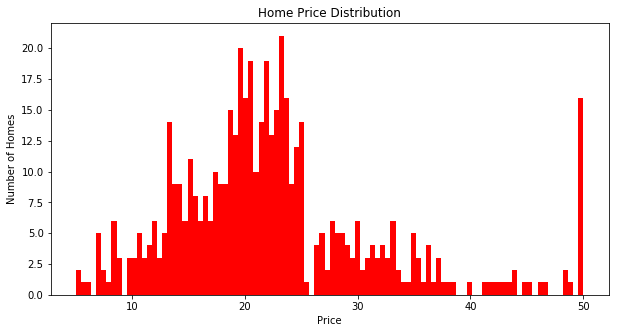

In [94]:
# Visualize the Price distribution in our dataset. 
plt.figure(figsize=(10,5))
plt.hist(data['Price'], color='red', bins=100)
plt.xlabel('Price')
plt.ylabel('Number of Homes')
plt.title('Home Price Distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

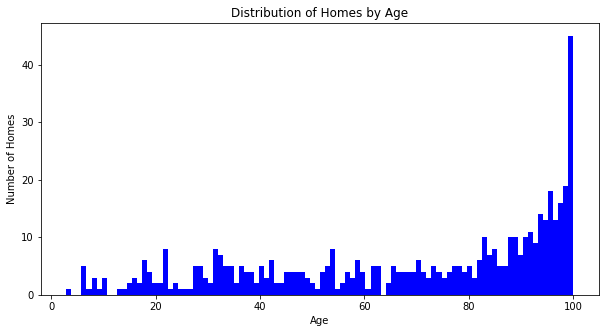

In [95]:
# Visualize the Age distribution of houses in our dataset. 
plt.figure(figsize=(10,5))
plt.hist(data['AGE'], color='blue', bins=100)
plt.xlabel('Age')
plt.ylabel('Number of Homes')
plt.title('Distribution of Homes by Age')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

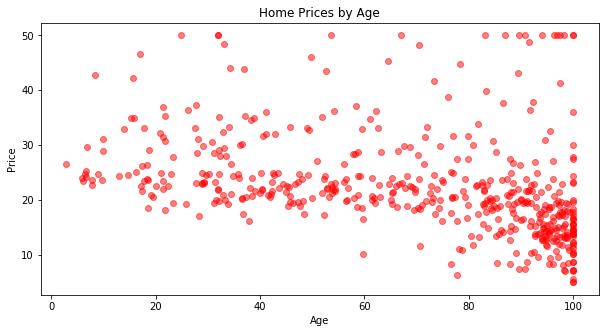

In [96]:
# Visualise the Home Price distribution by Age
plt.figure(figsize=(10,5))
plt.scatter(x=data.AGE, y=data.Price, color='Red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Home Prices by Age')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

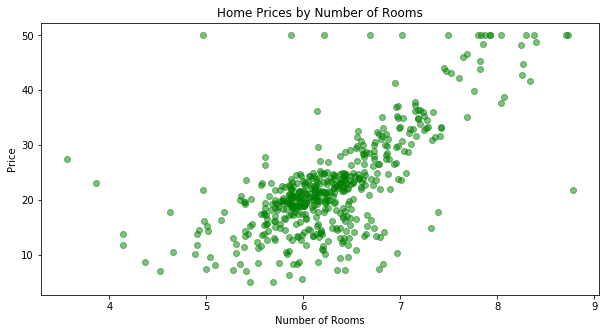

In [97]:
# Visualise the Home Price distribution by number of Rooms
plt.figure(figsize=(10,5))
plt.scatter(x=data.RM, y=data.Price, color='green', alpha=0.5)
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Home Prices by Number of Rooms')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

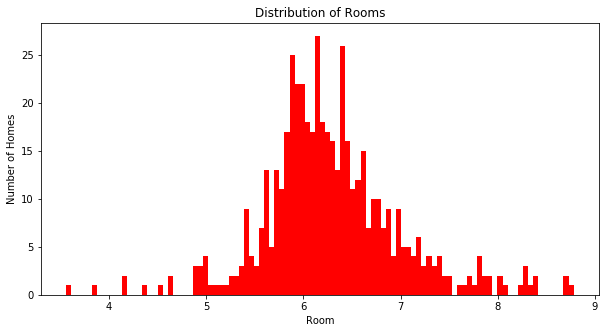

In [98]:
# Visualize the Room distribution in our dataset. 
plt.figure(figsize=(10,5))
plt.hist(data['RM'], color='red', bins=100)
plt.xlabel('Room')
plt.ylabel('Number of Homes')
plt.title('Distribution of Rooms')
plt.show

In [99]:
# Seems like there is a one home with a large number of rooms priced pretty low. Lets see if this is an outlier
data['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [100]:
data['RM'].sort_values().tail(15)

283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

In [101]:
# Look at the prices based on the number of rooms for the records above
data.loc[[97,163,224,225,232,257,267,364]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7
257,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9


In [102]:
# Based on the comparison with other columns in the dataset, Does not seem like it is an outlier.
# Therefore I will keep the data for that home.

### Since my dataset has no null values and all are numeric values I will start working on the ML Model

## Building a Random Forest Model

### Split the dataset into training set and test set

In [119]:
# Split the feature set and target set

features = data.drop(columns='Price')
targets = data['Price']

In [120]:
# Split the data into 75% training set and 25% test set

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.25, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [121]:
# Since the dataset is in different units ( Age = Years, Distance = Miles, Tax = Dollars),
# apply standard scaler to the X_train and X_test.

sc = StandardScaler()

# Transform and fit both the training and testing data

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [122]:
# Create the model
rfg = RandomForestRegressor(n_estimators= 30, random_state=0)
rfg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [109]:
# Make predictions
rfg_pred = rfg.predict(X_test)

<function matplotlib.pyplot.show(*args, **kw)>

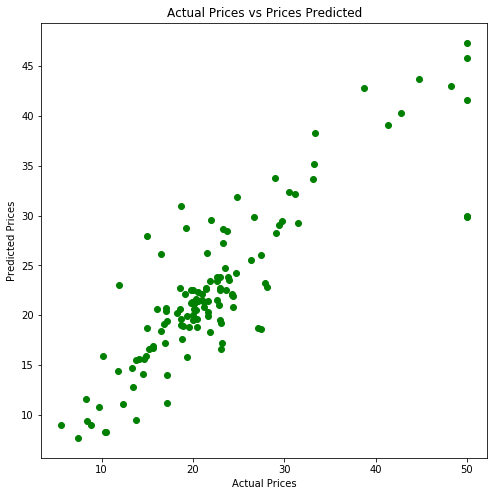

In [142]:
# Visualize the Actual Price compared to the predicted price. 

plt.figure(figsize=(8,8))
plt.scatter(y_test,rfg_pred, color = 'green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Prices Predicted')
plt.show

In [137]:
# Evaluate the model performance metric

score = r2_score(y_test,rfg_pred)
print('R Sqaured Score of the Test data is: R^2 = %0.5f' % score)
print('Random Forest Regression ML Model Performance on the Test data is: MAE = %0.5f'% mean_absolute_error(y_test,rfg_pred))

R Sqaured Score of the Test data is: R^2 = 0.75635
Random Forest Regression ML Model Performance on the Test data is: MAE = 2.91562


In [138]:
# Using the given Boston Housing data, our machine learning model can predict the house prices within 3 points
# at a 76% accuracy.